<a href="https://colab.research.google.com/github/csabi0312/GlobOpt2/blob/main/GlobOpt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages

In [1]:
!git clone https://github.com/csabi0312/GlobOpt2.git

Cloning into 'GlobOpt2'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 56 (delta 19), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (56/56), done.


In [2]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
pip install rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 237 kB 6.0 MB/s 
     |████████████████████████████████| 51 kB 8.1 MB/s 


In [4]:
from rich.progress import track

# Simulated annealing TSP

In [ ]:
def anneal(cities,nsteps=20000000,precision=0.1,max_iter=5000,T=1.0):
  """
  params:
  - cities: list of lists, 
  -
  -
  """
  num_cit=len(cities)
  A=np.zeros(shape=(num_cit,num_cit))
  route=list(np.arange(0,num_cit,1))
  

  for i in range(num_cit):
    for j in range(num_cit):
      A[i][j]=(np.sum((cities[i]-cities[j])**2))**0.5

  def distance(rt):
    szum=0
    for k in range(num_cit-1):
      szum+=A[rt[k]][rt[k+1]]
    szum+=A[rt[-1]][rt[0]]
    return szum

  dist=[]


  for l in range(nsteps):
    arr=np.random.choice(num_cit,size=2,replace=False)
    arr.sort()
    i=arr[0]
    j=arr[1]
    new_route=[]
    new_route2=[]

    dist.append(distance(route))

    if np.abs(i-j)<=1:
      continue

    elif j==(num_cit-1) and i==0:
      continue

    elif j==(num_cit-1) and i!=0:
      new_route=[route[j]] + list(np.flip(route[0:i+1])) + route[i+1:j]

    elif j-i>1:
      new_route=route[:i+1]+list(np.flip(route[i+1:j+1]))+route[j+1:]

    if distance(new_route)<distance(route):
      route=list(np.copy(new_route))

    elif distance(new_route)>=distance(route):
      p = np.exp(-(distance(new_route)-distance(route)) / T)
      if np.random.uniform()<p:
        route=list(np.copy(new_route))
      T=0.99995*T

    if l>max_iter:
      if np.abs(dist[-max_iter]-dist[-1])<=precision:
        break


  cit_last=[]
  for i in range(len(route)):
    cit_last.append(list(cities[route[i]]))

  return  np.array(cit_last),dist

# Test on an example

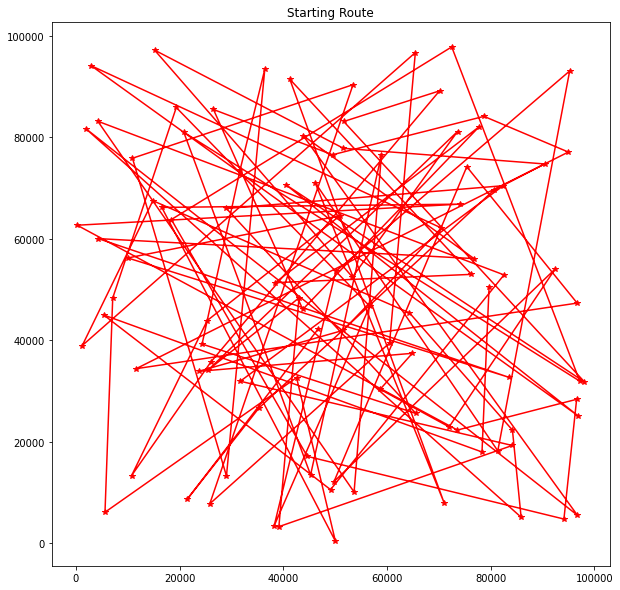

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
num_cities=100
cities=np.random.choice(100000,size=(num_cities,2),replace=False)
plt.plot(cities[:,0],cities[:,1],"r*-")
plt.title("Starting Route")
plt.show()

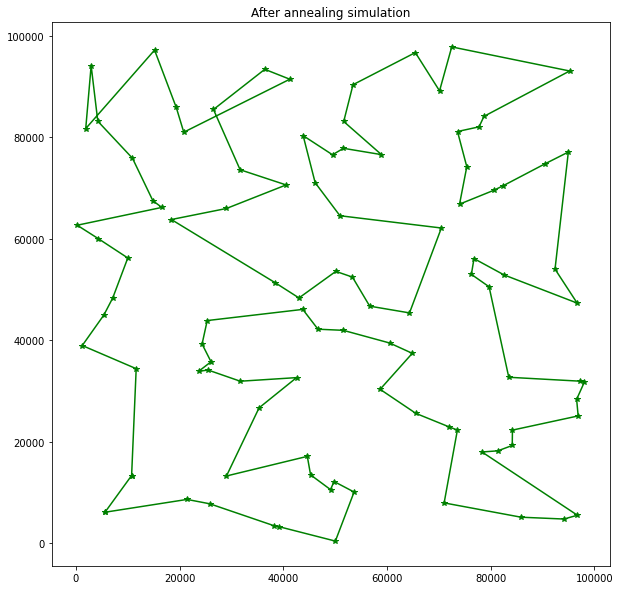

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
cities2,dist=anneal(cities=cities)
plt.plot(cities2[:,0],cities2[:,1],"g*-")
plt.plot(cities2[[0,-1],0],cities2[[0, -1],1],"g*-")
plt.title("After annealing simulation")
plt.show()

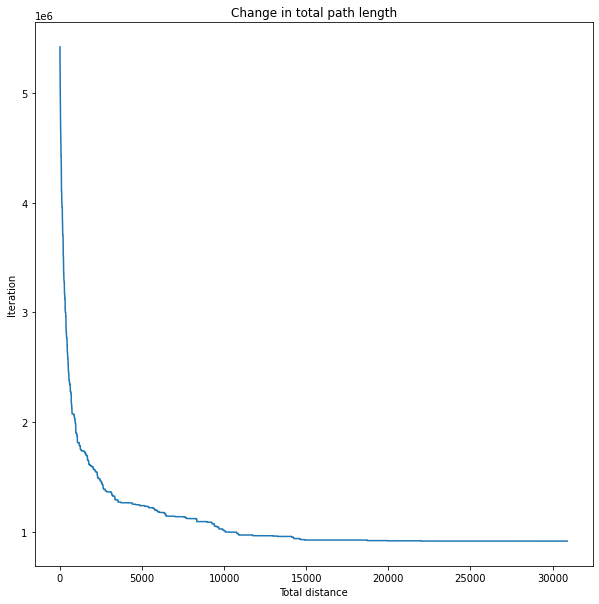

In [ ]:
plt.plot(np.arange(0,len(dist),1),dist)
plt.title("Change in total path length")
plt.ylabel("Iteration")
plt.xlabel('Total distance')
plt.show()

# Trying out the algorithm with different number of cities

Output()

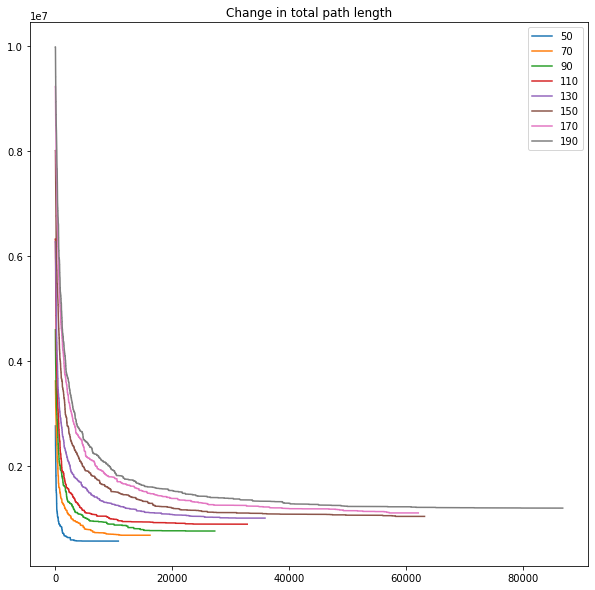

In [ ]:
for num_cities in track(np.arange(50,200,20),description="Process"):
  cities=np.random.choice(100000,size=(num_cities,2),replace=False)
  cities2,dist=anneal(cities=cities)
  plt.plot(np.arange(0,len(dist),1),dist,label=str(num_cities))
  plt.title("Change in total path length")
plt.legend()
plt.show()

# Trying out on Hungarian cities

In [5]:
df=pd.read_excel('GlobOpt2/psoft-telepules-matrix-30000.xls',index_col=0).fillna(0)
A_matrix=df.to_numpy()[:-1].tolist()
citi_n=df.index[:-1].to_list()

In [6]:
def anneal2(A,citi_names,nsteps=20000000,precision=0.1,max_iter=15000,T=1.0):

  num_cit=len(A)
  route=list(np.arange(0,num_cit,1))

  def distance(rt):
    szum=0
    for k in range(num_cit-1):
      szum+=A[rt[k]][rt[k+1]]
    szum+=A[rt[-1]][rt[0]]
    return szum

  dist=[]


  for l in range(nsteps):
    arr=np.random.choice(num_cit,size=2,replace=False)
    arr.sort()
    i=arr[0]
    j=arr[1]
    new_route=[]
    new_route2=[]

    dist.append(distance(route))

    if np.abs(i-j)<=1:
      continue

    elif j==(num_cit-1) and i==0:
      continue

    elif j==(num_cit-1) and i!=0:
      new_route=[route[j]] + list(np.flip(route[0:i+1])) + route[i+1:j]

    elif j-i>1:
      new_route=route[:i+1]+list(np.flip(route[i+1:j+1]))+route[j+1:]

    if distance(new_route)<distance(route):
      route=list(np.copy(new_route))

    elif distance(new_route)>=distance(route):
      p = np.exp(-(distance(new_route)-distance(route)) / T)
      if np.random.uniform()<p:
        route=list(np.copy(new_route))
      T=0.99995*T

    if l>max_iter:
      if np.abs(dist[-max_iter]-dist[-1])<=precision:
        break

  #citi_names.sort(key=route)
  

  #return  route,citi_names,dist
  return route

In [7]:
rot=anneal2(A=A_matrix,citi_names=citi_n)
sort_cit=[citi_n[i].strip() for i in rot]

In [8]:
sort_cit.index('Budapest')

9

In [9]:
data_kor=pd.read_excel('GlobOpt2/tables.helyseg_hu.xls')

In [10]:
data_kor.query('Helységnév in @sort_cit',inplace=True)
new_index=[]
for i in data_kor['Helységnév']:
  new_index.append(sort_cit.index(i))
data_kor.index=new_index
data_kor.sort_index(inplace=True)
data_kor.columns

Index(['Helységnév', 'Keleti hosszúság, fok:perc.századperc',
       'Északi szélesség, fok:perc.századperc'],
      dtype='object')

In [11]:
#Átváltjuk a fokperceket fokra:  
# Converting 
# string format: [0:1] a perc; [2] az a ':'  ; [3,4] fokperc;   [5] az a '.' ;  [6:7] a századperc

def degmin_to_deg(DegMin):

  x_FOK = float(DegMin[0:2])
  y_PERC = 0.01 * float(DegMin[3:5])
  z_SZAZPERC = 0.0001* float(DegMin[6:8])
  w_PERC = y_PERC + z_SZAZPERC

  True_fok = x_FOK + w_PERC*(5/3)

  return True_fok

# Hozzáadni a dataframehez a javított oszlopokat

KeletiHossz_fok = data_kor['Keleti hosszúság, fok:perc.századperc'].copy()
EszakiSzel_fok = data_kor['Északi szélesség, fok:perc.századperc'].copy()

for i in range(len(KeletiHossz_fok)):
  KeletiHossz_fok[i] = degmin_to_deg(KeletiHossz_fok[i])
  EszakiSzel_fok[i] = degmin_to_deg(EszakiSzel_fok[i])

data_kor['Keleti hosszúság, fok'] = KeletiHossz_fok
data_kor['Északi szélesség, fok'] = EszakiSzel_fok



data_kor

,Helységnév,"Keleti hosszúság, fok:perc.századperc","Északi szélesség, fok:perc.századperc","Keleti hosszúság, fok","Északi szélesség, fok"
0,Nyíregyháza,21:28.34,48:07.45,21.472333,48.124167
1,Miskolc,20:47.96,48:06.22,20.799333,48.103667
2,Kazincbarcika,20:38.29,48:15.24,20.638167,48.254
3,Ózd,20:17.66,48:13.30,20.294333,48.221667
4,Salgótarján,19:48.88,48:06.66,19.814667,48.111
5,Eger,20:22.75,47:54.04,20.379167,47.900667
6,Gyöngyös,19:55.69,47:46.87,19.928167,47.781167
7,Gödöllő,19:21.37,47:36.06,19.356167,47.601
8,Vác,19:08.09,47:47.03,19.134833,47.783833
9,Budapest,19:09.56,47:28.95,19.159333,47.4825


In [12]:
data_kor.to_excel('data_koordinatak.xlsx')

Visualizing the data

In [13]:
%%capture
!pip install pyshp

In [14]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sf = shp.Reader('/content/GlobOpt2/HUN_adm1.shp')

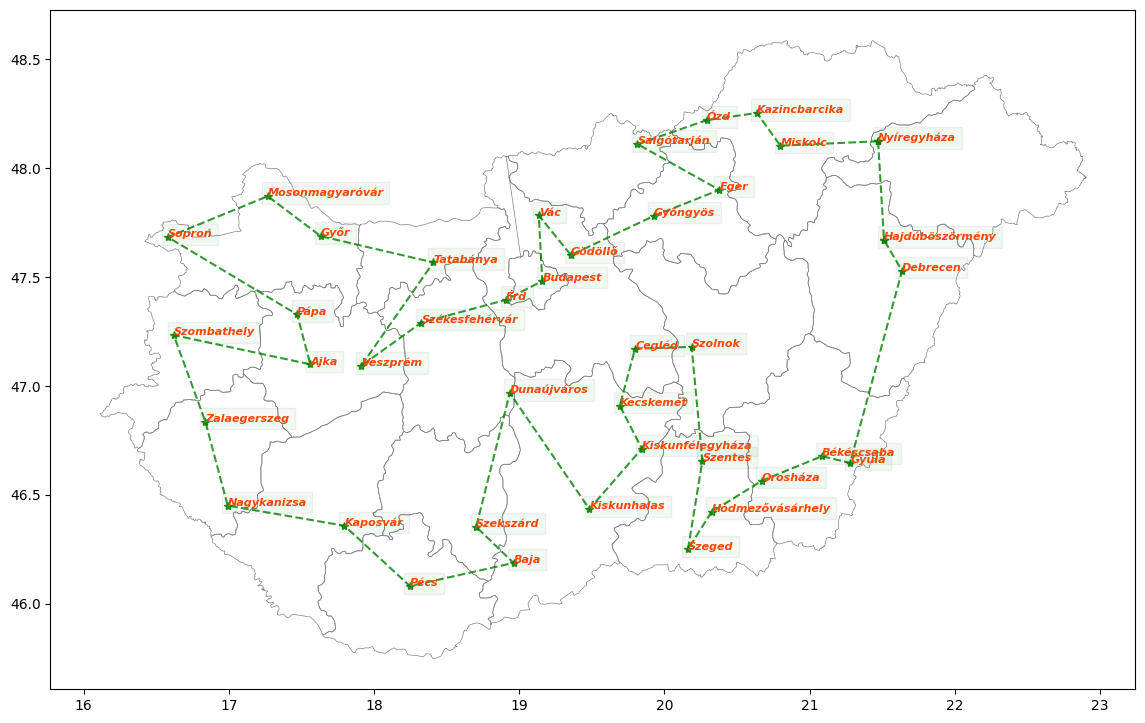

In [50]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (14,9)):
    plt.figure(figsize = figsize, dpi=100)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k',linewidth=0.5,color='gray')
     
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, "", fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)


    for i in range(data_kor.shape[0]):
      x = data_kor['Keleti hosszúság, fok'][i]
      y = data_kor['Északi szélesség, fok'][i]
      plt.text(x, y, str(data_kor['Helységnév'][i]), fontsize=8,color='orangered',weight='bold',style='italic',bbox=(dict(facecolor='green', alpha=0.05)))

    plt.plot(data_kor['Keleti hosszúság, fok'][:],data_kor['Északi szélesség, fok'][:],"g*--",alpha=0.8)
    plt.plot([data_kor['Keleti hosszúság, fok'][0],data_kor['Keleti hosszúság, fok'][39]], 
             [data_kor['Északi szélesség, fok'][0],data_kor['Északi szélesség, fok'][39]], "g*--",alpha=0.8)

#calling the function and passing required parameters to plot the full map
plot_map(sf)